# XGBoost simple example (SageMaker version)

source : https://www.datacamp.com/community/tutorials/xgboost-in-python

- 미리 boston_train.csv와 boston_test.csv를 노트북에서 업로드하여 사용한다

### 학습/테스트 데이터셋  S3 데이터 업로드

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('boston_train.csv',skiprows=1,header=None)
display(train_df)
test_df = pd.read_csv('boston_test.csv',skiprows=1,header=None)
test_df

,0,1,2,3,4,5,6,7,8,9
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0


,0,1,2,3,4,5,6,7,8,9
0,0.13587,0.0,10.59,0.489,6.064,59.1,4.2392,277,18.6,24.4
1,0.08664,45.0,3.44,0.437,7.178,26.3,6.4798,398,15.2,36.4
2,0.26938,0.0,9.90,0.544,6.266,82.8,3.2628,304,18.4,21.6
3,0.05302,0.0,3.41,0.489,7.079,63.1,3.4145,270,17.8,28.7
4,0.06860,0.0,2.89,0.445,7.416,62.5,3.4952,276,18.0,33.2
...,...,...,...,...,...,...,...,...,...,...
95,0.13262,0.0,8.56,0.520,5.851,96.7,2.1069,384,20.9,19.5
96,6.80117,0.0,18.10,0.713,6.081,84.4,2.7175,666,20.2,20.0
97,12.80230,0.0,18.10,0.740,5.854,96.6,1.8956,666,20.2,10.8
98,10.23300,0.0,18.10,0.614,6.185,96.7,2.1705,666,20.2,14.6


####  SageMaker 에서 제공하는 XGBoost를 사용하기 위해 첫번째 컬럼에 레이블이 오도록 데이터셋을 생성하고 S3에 업로드합니다. 

In [2]:
train_0 = train_df.iloc[:,0].copy()
train_9 = train_df.iloc[:,-1].copy()
train_df.iloc[:,0] = train_9
train_df.iloc[:,-1]= train_0
train_df

,0,1,2,3,4,5,6,7,8,9
0,23.8,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,2.30040
1,12.7,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,13.35980
2,26.6,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,0.12744
3,21.7,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,0.15876
4,34.6,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,0.03768
...,...,...,...,...,...,...,...,...,...,...
395,21.2,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,0.23912
396,23.3,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,0.04560
397,13.2,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,1.38799
398,11.0,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,7.36711


In [3]:
test_0 = test_df.iloc[:,0].copy()
test_9 = test_df.iloc[:,-1].copy()
test_df.iloc[:,0] = test_9
test_df.iloc[:,-1]= test_0
test_df

,0,1,2,3,4,5,6,7,8,9
0,24.4,0.0,10.59,0.489,6.064,59.1,4.2392,277,18.6,0.13587
1,36.4,45.0,3.44,0.437,7.178,26.3,6.4798,398,15.2,0.08664
2,21.6,0.0,9.90,0.544,6.266,82.8,3.2628,304,18.4,0.26938
3,28.7,0.0,3.41,0.489,7.079,63.1,3.4145,270,17.8,0.05302
4,33.2,0.0,2.89,0.445,7.416,62.5,3.4952,276,18.0,0.06860
...,...,...,...,...,...,...,...,...,...,...
95,19.5,0.0,8.56,0.520,5.851,96.7,2.1069,384,20.9,0.13262
96,20.0,0.0,18.10,0.713,6.081,84.4,2.7175,666,20.2,6.80117
97,10.8,0.0,18.10,0.740,5.854,96.6,1.8956,666,20.2,12.80230
98,14.6,0.0,18.10,0.614,6.185,96.7,2.1705,666,20.2,10.23300


In [4]:
train_df.to_csv('boston_train_new.csv', index=False, header=False)
test_df.to_csv('boston_valid.csv', index=False, header=False)

In [5]:
import sagemaker

sess = sagemaker.Session()
bucket = sagemaker.Session().default_bucket()  # replace with an existing bucket if needed
prefix = 'sagemaker/DEMO-boston-sm'           # prefix used for all data stored within the bucket

# Define IAM role
import boto3
from sagemaker import get_execution_role

role = get_execution_role()
bucket

'sagemaker-us-east-1-654304825407'

In [6]:
import os 
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('boston_train_new.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('boston_valid.csv')

### SageMaker XGBoost를 이용한 Regression 학습


In [7]:
from sagemaker.amazon.amazon_estimator import image_uris
container = image_uris.retrieve('xgboost', region=sess.boto_region_name, version='latest')
# https://sagemaker.readthedocs.io/en/stable/api/utility/image_uris.html
# URI(Uniform Resource Identifier)
# Retrieves the ECR URI for the Docker image matching the given arguments.

s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_valid = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/validation/'.format(bucket, prefix), content_type='csv')


- SageMaker를 이용하여 Cloud에서 학습을 실행합니다. (3~5분 정도 소요됩니다.)

In [8]:
%%time
xgb = sagemaker.estimator.Estimator(container,
                                    role, 
                                    instance_count=1, 
                                    instance_type='ml.m4.xlarge',
                                    output_path='s3://{}/{}/output'.format(bucket, prefix),
                                    sagemaker_session=sess)
xgb.set_hyperparameters(objective ='reg:linear', 
                        colsample_bytree = 0.3, 
                        learning_rate = 0.1,
                        max_depth = 5, 
                        alpha = 10, 
                        n_estimators = 100,
                        num_round=100)

xgb.fit({'train': s3_input_train, 'validation': s3_input_valid})

INFO:sagemaker:Creating training-job with name: xgboost-2023-05-20-08-43-41-671


2023-05-20 08:43:42 Starting - Starting the training job...
2023-05-20 08:44:16 Starting - Preparing the instances for training.........
2023-05-20 08:45:32 Downloading - Downloading input data...
2023-05-20 08:46:02 Training - Downloading the training image...
2023-05-20 08:46:48 Training - Training image download completed. Training in progress...Arguments: train
[2023-05-20:08:47:00:INFO] Running standalone xgboost training.
[2023-05-20:08:47:00:INFO] File size need to be processed in the node: 0.03mb. Available memory size in the node: 8594.75mb
[2023-05-20:08:47:00:INFO] Determined delimiter of CSV input is ','
[08:47:00] S3DistributionType set as FullyReplicated
[08:47:00] 400x9 matrix with 3600 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-05-20:08:47:00:INFO] Determined delimiter of CSV input is ','
[08:47:00] S3DistributionType set as FullyReplicated
[08:47:00] 100x9 matrix with 900 entries loaded from /opt/ml/input/data/validation?fo

### Deployment & test

`deploy`명령을 이용하여 서비스환경으로 바로 배포할 수 있습니다.

In [9]:
xgb_predictor = xgb.deploy(initial_instance_count=1,
                           instance_type='ml.m4.xlarge')

INFO:sagemaker:Creating model with name: xgboost-2023-05-20-08-47-35-429
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-05-20-08-47-35-429
INFO:sagemaker:Creating endpoint with name xgboost-2023-05-20-08-47-35-429


------!

`test_df`중 임의의 레코드를 이용하여 `predict()`를 호출합니다.

In [10]:
from sagemaker.serializers import CSVSerializer
xgb_predictor.serializer = CSVSerializer()
import numpy as np
feat = np.array(test_df.iloc[:1,1:])
xgb_predictor.predict(feat)

b'23.99728012084961'

`test_df`전체 레코드를 이용하여 추론을 실행합니다.

In [11]:
def predict(feat_array):
    predictions = []
    for array in feat_array:
        predictions.append(float(xgb_predictor.predict(array).decode('utf-8')))
    return predictions

In [12]:
feats = np.array(test_df.iloc[:,1:])
results = predict(feats)

### Check the result

In [13]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_df.iloc[:,0], results))
print("RMSE: %f" % (rmse))

RMSE: 2.903260


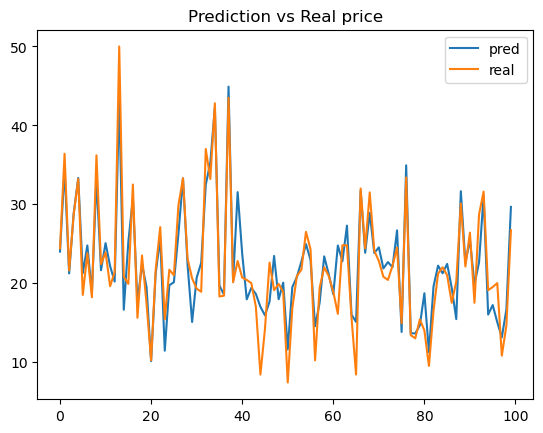

In [14]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.plot(np.array(test_df.iloc[:,0]))
plt.legend(['pred','real'])
plt.title('Prediction vs Real price')
plt.show()

In [15]:
# 배포된 모델 엔드포인트 삭제
xgb_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: xgboost-2023-05-20-08-47-35-429
INFO:sagemaker:Deleting endpoint with name: xgboost-2023-05-20-08-47-35-429
